# 텍스트 마이닝 입문_1

                                       note by D.H.Yeom

**[학습목표]**
1. 자연어 처리를 위한 전처리 기법에 대해 설명할 수 있다.
2. 자연어 전처리에 필요한 라이브러리를 이해하고 설치할 수 있다.
3. 전처리한 데이터를 워드클라우드로 시각화할 수 있다.

**[학습목차]**
1. 자연어 처리 환경 구축
3. 워드클라우드 시각화

## 1.자연어 처리를 위한 환경 구축

### 1.1 토큰화에 필요한 모듈 설치

#### 1) KoNLPy 설치

In [1]:
!pip install konlpy
#!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 48.3 MB/s eta 0:00:00


* KoNLPy 설치 확인 : show 명령어 사용

In [2]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.10/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


#### 2) 형태소 분석기 생성하기

* 형태소를 토큰화하기 위해서는 형태소 분석기가 필요하다.
* 형태소 분석기는 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있다.
* 여기서는 Okt를 사용한다

In [3]:
# Okt 분석기 생성
from konlpy.tag import Okt
okt = Okt()

In [4]:
# 코코마 분석기 생성
from konlpy.tag import Kkma
kkma = Kkma()

## 2. 토큰화 하기

* 형태소 분석은 다음 메소드를 활용한다.
* phrases(): 어구, morphs():형태소, nouns():명사, pos():품사태깅 등이 있다.
* pos(Part-of-speech tagging)

In [5]:
#phrases: 어구 추출
from konlpy.tag import Okt
okt = Okt()

token = okt.phrases('한신대학교는 소중한 꿈을 실현하도록 응원합니다.')
print(token)

['한신대학교', '소중한 꿈', '실현', '응원']


In [ ]:
# morphs: 형태소별 추출
from konlpy.tag import Okt
okt = Okt()

token1 = okt.morphs('한신대학교는 소중한 꿈을 실현하도록 응원합니다.')
print(token1)

['한', '신', '대학교', '는', '소중한', '꿈', '을', '실현', '하도록', '응원', '합니다', '.']


In [ ]:
#nouns: 명사 추출
from konlpy.tag import Okt
okt = Okt()

token2 = okt.nouns('한신대학교는 소중한 꿈을 실현하도록 응원합니다.')
print(token2)

['대학교', '꿈', '실현', '응원']


In [ ]:
# pos: 단어와 품사 정보를 튜플 형태도 추출
from konlpy.tag import Okt
okt = Okt()

token3 = okt.pos('한신대학교는 소중한 꿈을 실현하도록 응원합니다.')
print(token3)

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('소중한', 'Adjective'), ('꿈', 'Noun'), ('을', 'Josa'), ('실현', 'Noun'), ('하도록', 'Verb'), ('응원', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]


In [ ]:
# 파라미터로 join = True를 추가하면 품사정보를 포함한 문자열로 추출
from konlpy.tag import Okt
okt = Okt()

token3 = okt.pos('한신대학교는 소중한 꿈을 실현하도록 응원합니다.')
print(token3)

token4 = okt.pos('한신대학교는 소중한 꿈을 실현하도록 응원합니다.', join = True)
print(token4)

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('소중한', 'Adjective'), ('꿈', 'Noun'), ('을', 'Josa'), ('실현', 'Noun'), ('하도록', 'Verb'), ('응원', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]
['한/Determiner', '신/Modifier', '대학교/Noun', '는/Josa', '소중한/Adjective', '꿈/Noun', '을/Josa', '실현/Noun', '하도록/Verb', '응원/Noun', '합니다/Verb', './Punctuation']


In [ ]:
# phrases : 어구 추출
from konlpy.tag import Okt
okt = Okt()

token4 = okt.phrases('한신대학교는 소중한 꿈을 실현하도록 응원합니다.')
print(token4)

['한신대학교', '소중한 꿈', '실현', '응원']


**Okt와 Kkma 비교**

In [ ]:
print('Okt 형태소 분석:', okt.morphs('한신대학교는 소중한 꿈을 실현하도록 응원합니다.'))
print('Okt 명사 추출:', okt.nouns('한신대학교는 소중한 꿈을 실현하도록 응원합니다.'))
print('Okt 품사태깅:', okt.pos('한신대학교는 소중한 꿈을 실현하도록 응원합니다.'))

Okt 형태소 분석: ['한', '신', '대학교', '는', '소중한', '꿈', '을', '실현', '하도록', '응원', '합니다', '.']
Okt 명사 추출: ['대학교', '꿈', '실현', '응원']
Okt 품사태깅: [('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('소중한', 'Adjective'), ('꿈', 'Noun'), ('을', 'Josa'), ('실현', 'Noun'), ('하도록', 'Verb'), ('응원', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]


In [ ]:
print('Kkma 형태소 분석:', kkma.morphs('한신대학교는 소중한 꿈을 실현하도록 응원합니다.'))
print('Kkma 명사 추출:', kkma.nouns('한신대학교는 소중한 꿈을 실현하도록 응원합니다.'))
print('Kkma 품사태킹:', kkma.pos('한신대학교는 소중한 꿈을 실현하도록 응원합니다.'))

Kkma 형태소 분석: ['한', '신대', '학교', '는', '소중', '하', 'ㄴ', '꿈', '을', '실현', '하', '도록', '응원', '하', 'ㅂ니다', '.']
Kkma 명사 추출: ['신대', '신대학교', '학교', '꿈', '실현', '응원']
Kkma 품사태킹: [('한', 'MDN'), ('신대', 'NNG'), ('학교', 'NNG'), ('는', 'JX'), ('소중', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETD'), ('꿈', 'NNG'), ('을', 'JKO'), ('실현', 'NNG'), ('하', 'XSV'), ('도록', 'ECD'), ('응원', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


#### 토큰화 실습

In [ ]:
# pos로 토큰화
from konlpy.tag import Okt
okt = Okt()

text = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 "인간애" 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 "더불어 사는 삶" 을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

sentence_tag = okt.pos(text)
print(sentence_tag)

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('기독교', 'Noun'), ('정신', 'Noun'), ('에', 'Josa'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('진리', 'Noun'), ('탐구', 'Noun'), (',', 'Punctuation'), ('자유', 'Noun'), ('구현', 'Noun'), (',', 'Punctuation'), ('사랑', 'Noun'), ('실천', 'Noun'), ('의', 'Josa'), ('교육', 'Noun'), ('을', 'Josa'), ('이념', 'Noun'), ('으로', 'Josa'), ('역사', 'Noun'), ('의', 'Josa'), ('험로', 'Noun'), ('를', 'Josa'), ('따라', 'Verb'), ('82년', 'Number'), ('을', 'Foreign'), ('걸어왔습니다', 'Verb'), ('.', 'Punctuation'), ('지나', 'Noun'), ('온', 'Noun'), ('역사', 'Noun'), ('속', 'Noun'), ('에서', 'Josa'), ('한신', 'Noun'), ('은', 'Josa'), ('학문', 'Noun'), ('과', 'Josa'), ('양심', 'Noun'), ('의', 'Josa'), ('자유', 'Noun'), (',', 'Punctuation'), ('인권', 'Noun'), ('과', 'Josa'), ('민주화', 'Noun'), (',', 'Punctuation'), ('민족', 'Noun'), ('자주', 'Noun'), ('와', 'Josa'), ('평화통일', 'Noun'), (',', 'Punctuation'), ('세계', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('책임', 'Noun'), ('성', 'Suffix'), ('을', 'Josa'

In [ ]:
# 명사(nouns)로 토큰화
nouns = okt.nouns(text)
print(nouns)

['대학교', '기독교', '정신', '입', '각하', '진리', '탐구', '자유', '구현', '사랑', '실천', '교육', '이념', '역사', '험로', '지나', '온', '역사', '속', '한신', '학문', '양심', '자유', '인권', '민주화', '민족', '자주', '평화통일', '세계', '대한', '책임', '한국사', '회의', '변혁', '보수', '근본', '주의', '기독교', '일', '한국', '교회', '개혁', '대학교', '학문', '연구', '상아탑', '동시', '학생', '미래', '설계', '준비', '도움', '배움터', '학생', '꿈', '실현', '수', '노력', '한신', '교육', '학적', '영성', '깊이', '인문학', '상상력', '높이', '사회과학', '분석', '넓이', '과학', '창의성', '길이', '근간', '융', '복합', '지식', '탐구', '적용', '구현', '교육', '지향', '통해', '시대', '전환', '속', '가치', '삶', '실현', '미래', '지향', '인재', '낼', '것', '대학교', '교육', '지식', '정보', '전달', '인간', '대한', '존중', '예의', '바탕', '인간', '애', '구현', '형성', '목표', '이기심', '기초', '성공', '타인', '존중', '배려', '줄', '삶', '지향', '인간', '지향', '대학교', '여러분', '꿈', '실현', '응원']


In [ ]:
from collections import Counter
import collections

text = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 "인간애" 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 "더불어 사는 삶" 을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

adj_list = []
for word, tag in sentence_tag:
    if tag in ['Noun', 'Adjective']:    #품사 중에서 명사와 형용사만 추출
        adj_list.append(word)

counts = collections.Counter(adj_list)

tag = counts.most_common(20)           #상위 10개만 추출
print(tag)

[('대학교', 4), ('교육', 4), ('지향', 4), ('구현', 3), ('실현', 3), ('인간', 3), ('기독교', 2), ('탐구', 2), ('자유', 2), ('역사', 2), ('속', 2), ('한신', 2), ('학문', 2), ('대한', 2), ('학생', 2), ('미래', 2), ('꿈', 2), ('있습니다', 2), ('지식', 2), ('삶', 2)]


## 3 워드클라우드 생성하기

### 3.1 환경구축
#### 1) 라이브러리 설치

In [6]:
!pip install wordcloud

In [12]:
import matplotlib as mpl # 기본 설정
import matplotlib.pyplot as plt # 그래프 그리기
import matplotlib.font_manager as fm # 폰트 관리

#### 2) 한글 글꼴 설치

In [21]:
!apt-get update -qq # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치
fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe) # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [20]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

FileNotFoundError: ignored

In [ ]:
# 콜렙_나눔글꼴 설치

#! apt-get install fonts-nanum
#font_path = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

### 3.2 텍스트 가져오기

[텍스트 데이터: 한신대 총장 인사말](https://www.hs.ac.kr/kor/8382/subview.do)

In [14]:
text = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

### 3.3. 품사 태깅하기

In [15]:
sentence_tag = okt.pos(text)

adj_list = []
for word, tag in sentence_tag:           # 단어, 품사(대학교, Noun)
    if tag in ['Noun', 'Adjective']:     # 품사 중에서 명사와 형용사만 추출
        adj_list.append(word)

**[더보기]**
nouns() 추출

In [16]:
sentence_tag1 = okt.nouns(text)
print(sentence_tag1)

['대학교', '기독교', '정신', '입', '각하', '진리', '탐구', '자유', '구현', '사랑', '실천', '교육', '이념', '역사', '험로', '지나', '온', '역사', '속', '한신', '학문', '양심', '자유', '인권', '민주화', '민족', '자주', '평화통일', '세계', '대한', '책임', '한국사', '회의', '변혁', '보수', '근본', '주의', '기독교', '일', '한국', '교회', '개혁', '대학교', '학문', '연구', '상아탑', '동시', '학생', '미래', '설계', '준비', '도움', '배움터', '학생', '꿈', '실현', '수', '노력', '한신', '교육', '학적', '영성', '깊이', '인문학', '상상력', '높이', '사회과학', '분석', '넓이', '과학', '창의성', '길이', '근간', '융', '복합', '지식', '탐구', '적용', '구현', '교육', '지향', '통해', '시대', '전환', '속', '가치', '삶', '실현', '미래', '지향', '인재', '낼', '것', '대학교', '교육', '지식', '정보', '전달', '인간', '대한', '존중', '예의', '바탕', '인간', '애', '구현', '형성', '목표', '이기심', '기초', '성공', '타인', '존중', '배려', '줄', '삶', '지향', '인간', '지향', '대학교', '여러분', '꿈', '실현', '응원']


### 3.4 동일한 단어의 빈도수 추출하기

* collection.counter()를 사용해 빈도를 구한다.
* most_common()를 사용하면 빈도수가 많은 순서대로 추출할 수 있다.

In [17]:
counts = collections.Counter(adj_list)
tag = counts.most_common()
print(tag)

NameError: ignored

### 3.5 wordcloud 생성하기

In [18]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag))

ValueError: ignored

### 3.6 matplotlib으로 시각화하기(출력)

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(cloud)

NameError: ignored

<Figure size 1000x1000 with 0 Axes>

**[응용]**

* 상위 20개 단어만 추출하여 워드클라우드를 생성한다

In [ ]:
counts = collections.Counter(adj_list)
tag1 = counts.most_common(30)        # 20개만 추출
print(tag)

[('대학교', 4), ('교육', 4), ('지향', 4), ('구현', 3), ('실현', 3), ('인간', 3), ('기독교', 2), ('탐구', 2), ('자유', 2), ('역사', 2), ('속', 2), ('한신', 2), ('학문', 2), ('대한', 2), ('학생', 2), ('미래', 2), ('꿈', 2), ('있습니다', 2), ('지식', 2), ('삶', 2), ('존중', 2), ('정신', 1), ('입', 1), ('각하', 1), ('진리', 1), ('사랑', 1), ('실천', 1), ('이념', 1), ('험로', 1), ('지나', 1), ('온', 1), ('양심', 1), ('인권', 1), ('민주화', 1), ('민족', 1), ('자주', 1), ('평화통일', 1), ('세계', 1), ('책임', 1), ('한국사', 1), ('회의', 1), ('변혁', 1), ('주도했고', 1), ('보수', 1), ('근본', 1), ('주의', 1), ('일', 1), ('한국', 1), ('교회', 1), ('개혁', 1), ('연구', 1), ('상아탑', 1), ('동시', 1), ('설계', 1), ('준비', 1), ('도움', 1), ('배움터', 1), ('성장하고', 1), ('수', 1), ('있도록', 1), ('노력', 1), ('학적', 1), ('영성', 1), ('깊이', 1), ('인문학', 1), ('상상력', 1), ('높이', 1), ('사회과학', 1), ('분석', 1), ('넓이', 1), ('과학', 1), ('창의성', 1), ('길이', 1), ('근간', 1), ('융', 1), ('복합', 1), ('적용', 1), ('통해', 1), ('시대', 1), ('전환', 1), ('가치', 1), ('있는', 1), ('인재', 1), ('낼', 1), ('것', 1), ('입니다', 1), ('정보', 1), ('전달', 1), ('예의', 1), ('바탕', 1)

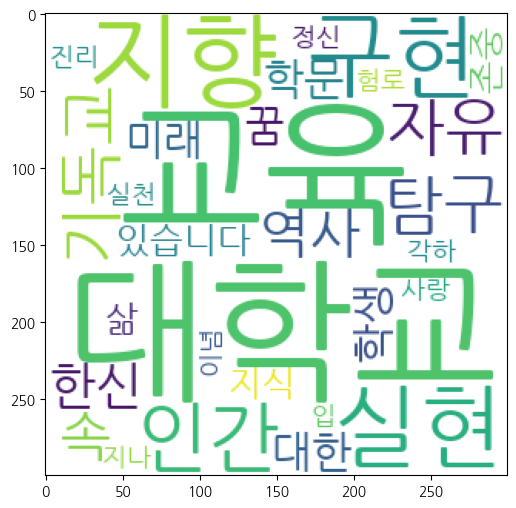

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag1))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(cloud)

# **수고 많았습니다. 굿럭!!**